## Visualizing distribution

이번에는 data distribution plot 을 그려봅니다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set()

### Plotting univariate distributions

Seaborn 은 univariate distribution 과 bivariate distribution 을 그리는 plot 을 지원합니다. 이를 위하여 평균 0, 표준편차 1인 정규분포에서 임의의 100 개의 데이터 `x` 를 만듭니다. `seaborn.distplot()` 함수에 이를 입력하면 histogram 과 추정된 밀도 곡선이 함께 그려집니다.

/home/lovit/anaconda3/envs/pytorch/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


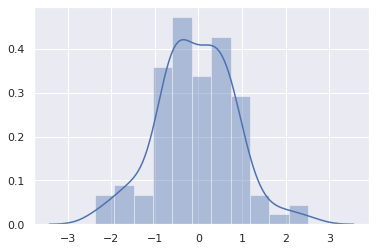

In [2]:
x = np.random.normal(size=100)
g = sns.distplot(x)

그런데 `seaborn.distplot()` 의 return type 이 matplotlib 의 AxesSubplot 입니다.

In [3]:
g

즉 `seaborn.distplot()` 함수를 호출할 때마다 새로운 그림을 그리는 것이 아니라, 이전 그림에 덧칠을 할 수 있다는 의미입니니다. 이번에는 동일한 정규분포에서 다른 샘플 `y` 를 만들고, `x` 와 `y` 를 각각 `seaborn.distplot()` 에 입력합니다. 두 개의 그림이 겹쳐져 그려짐을 확인할 수 있습니다. 분포 그림들이 주로 다른 분포들과 겹쳐져 거려지는 경우가 많기 때문으로 생각됩니다.

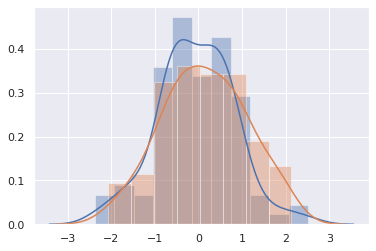

In [4]:
y = np.random.normal(size=100)
g0 = sns.distplot(x)
g1 = sns.distplot(y)

### Histograms

`seaborn.distplot()` 의 기본값은 `hist=True`, `kde=True`, `rug=False` 입니다. `hist` 는 historgram 을 그릴지 묻는 것이며, `kde` 는 kernel density estimation 을 수행할지 묻는 것입니다. 또한 `rug` 는 데이터 포인트를 그릴지 묻는 것입니다. 참고로 `seaborn.kdeplot()` 과 `seaborn.rugplot()` 은 함수입니다. 즉 `seaborn.distplot()` 은 여러 종류의 data distribution plots 을 한 번에 그려주는 종합함수입니다. `kde=False`, `rug=True` 로 변경하면 여전히 histogram 은 그려지지만 밀도 함수는 제거되고, x 축에 데이터의 밀도를 표현하는 그림이 그려집니다.

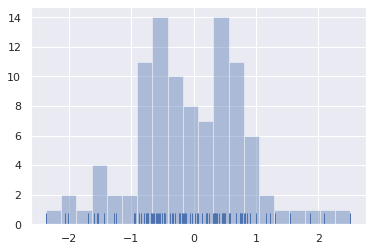

In [5]:
g = sns.distplot(x, hist=True, kde=False, rug=True, bins=20)

### Kernel density estimation

`seaborn.kdeplot()` 은 다양한 종류의 kernel 을 제공합니다. 기본값은 gaussian kernel 을 이용합니다. 이때 gaussian kernel 의 bandwidth 를 데이터 기반으로 측정하기도 하고, 혹은 `bw` 를 통하여 직접 설정할 수도 있습니다. 아래 그림은 bandwidth 가 넓어지면 smooth 한 distribution 이, bandwidth 가 좁아지면 날카로운 density estimation 이 이뤄짐을 볼 수 있습니다.

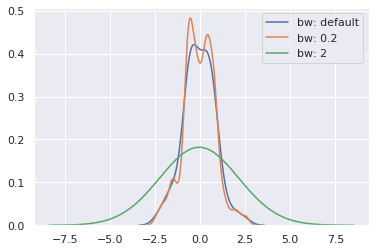

In [6]:
sns.kdeplot(x, label='bw: default')
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend()

### Fitting parametric distributions

혹은 `fit` 에 특정 함수를 입력할 수도 있습니다.

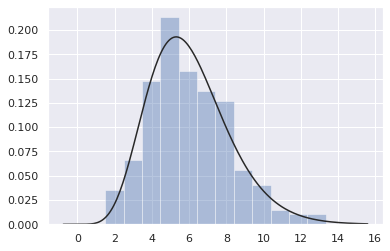

In [7]:
x = np.random.gamma(6, size=200)
g = sns.distplot(x, kde=False, fit=stats.gamma)

또한 `seaborn.distplot()` 에서 `kde=True` 를 설정하는 것은 `seaborn.kdeplot()` 을 실행하는 것과 같기 때문에 이 때 필요한 설정은 `kde_kws` 에 입력할 수 있습니다.

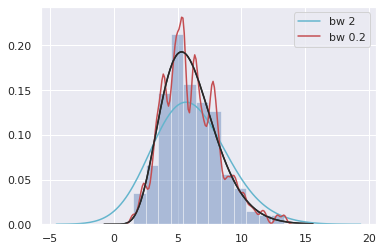

In [8]:
g = sns.distplot(x, hist=True, kde=True, fit=stats.gamma, kde_kws={'bw':2.0, 'color':'c', 'label':'bw 2'})
g = sns.distplot(x, hist=False, kde=True, fit=stats.gamma, kde_kws={'bw':0.2, 'color':'r', 'label':'bw 0.2'})

### Plotting bivariate distributions

2 차원의 정규분포로부터 임의의 데이터 200 개를 만들었습니다.

In [9]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

df.head(3)

,x,y
0,-0.681701,1.977984
1,-0.108547,1.047261
2,-0.767767,-0.329327


이 데이터의 joint distribution plot 을 그리기 위하여 `seaborn.jointplot()` 을 이용할 수 있습니다. 종류는 scatter plot, kernel density estimation, regression, residual, hexbin plot 을 제공합니다. 그 중 세 종류에 대해서 알아봅니다. `kind` 의 기본값은 scatter plot 입니다. 데이터를 입력하고 x, y 의 변수 이름을 입력할 수 있습니다.

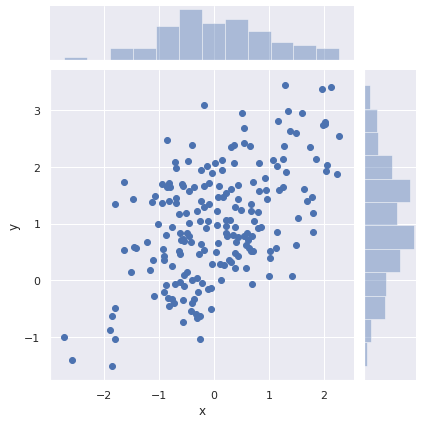

In [10]:
g = sns.jointplot(x="x", y="y", kind='scatter', data=df)

혹은 x 와 y 를 각각 입력할수도 있습니다. 각각 좌표의 sequence 를 준비합니다.

In [11]:
x, y = data.T
print(x[:5])
print(y[:5])

[-0.68170061 -0.10854677 -0.76776747  0.67274982 -0.82073625]
[ 1.97798404  1.04726107 -0.32932665  0.51447462  1.39611539]


이번에는 kernel density estimation plot 을 그려봅니다.

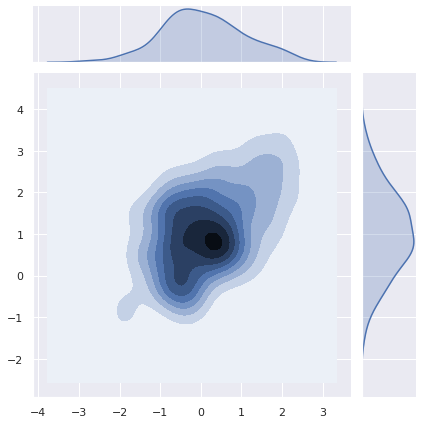

In [12]:
g = sns.jointplot(x=x, y=y, kind="kde")

Hexbin plot 은 지역을 육각형으로 나눈 뒤, 각 부분의 밀도를 색으로 표현합니다.

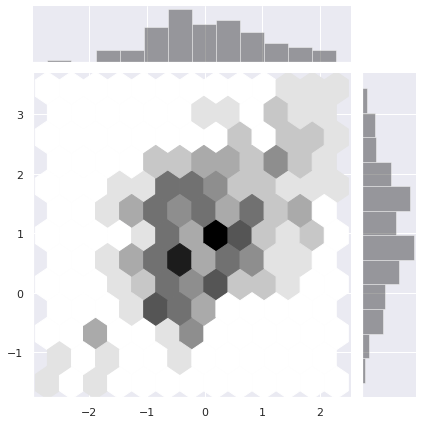

In [13]:
g = sns.jointplot(x=x, y=y, kind="hex", color="k")

그런데 모서리 부분의 style 이 지저분합니다. 이 그림에 대해서만 style 을 임시로 바꾸려면 파이썬 문법의 with 을 이용할 수 있습니다.

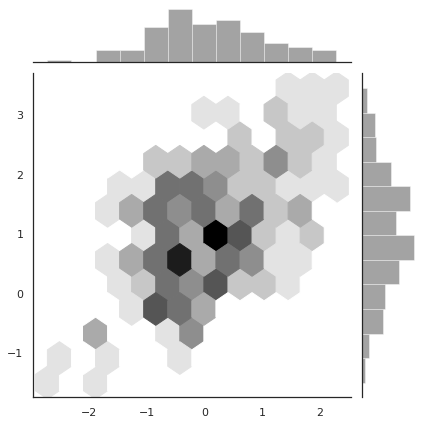

In [14]:
with sns.axes_style("white"):
    g = sns.jointplot(x=x, y=y, kind="hex", color="k")

이번에는 각 변수의 분포를 `seaborn.rugplot()` 으로 대체해봅니다. `seaborn.kdeplot()` 의 그림은 정방형이 아니기 때문에 미리 그림의 크기를 `matplotlib.pyplot.subplots()` 을 이용하여 정의합니다. `subplots()` 함수를 이용하면 grid plot 을 그릴 수 있는데, 이는 matplotlib 의 사용법을 추가로 찾아보시기 바랍니다. 지금은 grid plot 을 만들지 않았기 때문에 아래처럼 하나의 plot 에 여러 종류의 plots 을 덧그렸습니다.

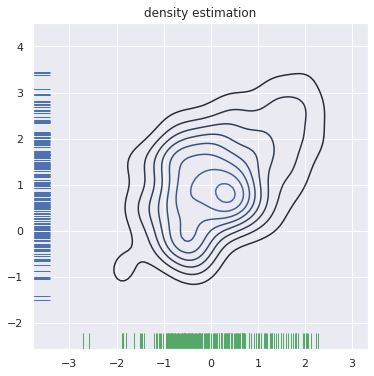

In [15]:
f, ax = plt.subplots(figsize=(6, 6))
g = sns.kdeplot(x, y, ax=ax)
g = sns.rugplot(x, color="g", ax=ax)
g = sns.rugplot(y, vertical=True, ax=ax)
g = g.set_title('density estimation')

혹은 등고선이 아닌 색으로 밀도를 표현할 수도 있습니다. 이를 위해 colormap 을 따로 설정하고 `shade=True` 를 설정합니다. 등고선이 아니라 색으로 표현한다는 의미입니다. cmap 은 256 단계의 밀도에 대하여 RGBA 형식으로 표현된 color vector 입니다. 그 형식은 numpy.ndarray 입니다.

<class 'matplotlib.colors.ListedColormap'>
(256, 4)


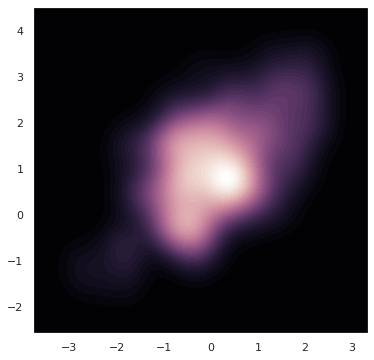

In [16]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
g = sns.kdeplot(x, y, cmap=cmap, n_levels=60, shade=True)

print(type(cmap))
print(cmap.colors.shape)

혹은 colormap 을 반대로 정의하면 밀도가 높은 부분을 진하게 표현할 수도 있습니다.

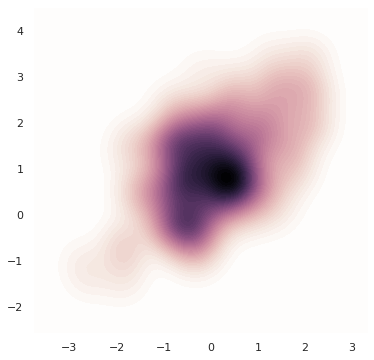

In [17]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=False)
g = sns.kdeplot(x, y, cmap=cmap, n_levels=60, shade=True)

이번에는 kernel density estimation plot 위에 흰 색의 + marker 의 scatter plot 을 추가하였습니다.

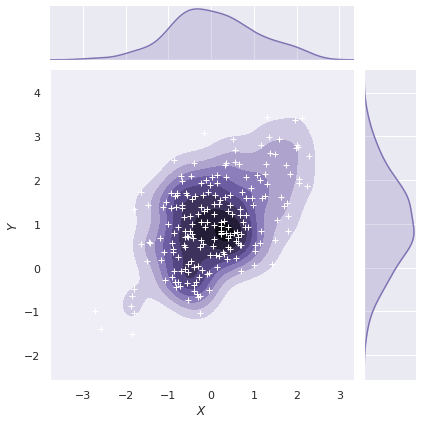

In [18]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m", shade=True)
g = g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g = g.set_axis_labels("$X$", "$Y$")